   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

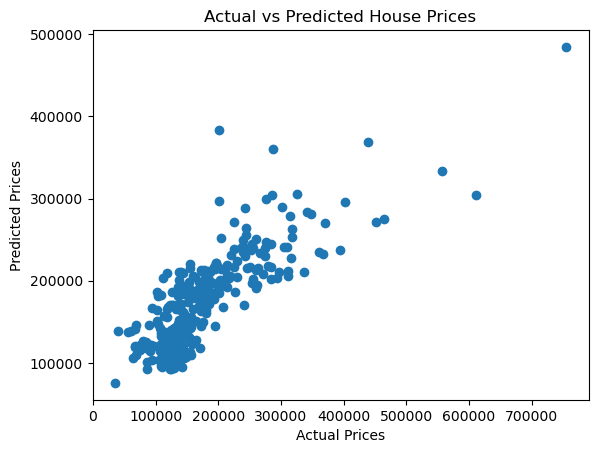

               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset from Kaggle (train.csv)
# Assuming you have downloaded the 'train.csv' from the competition
data = pd.read_csv('train.csv')

# Inspect the first few rows to understand the dataset
print(data.head())

# Select the relevant features for the model
# We will use 'GrLivArea' (above grade living area square footage),
# 'BedroomAbvGr' (number of bedrooms), and 'FullBath' (number of bathrooms) as features
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']  # Target variable is the house price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Optional: Coefficients of the model to interpret feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

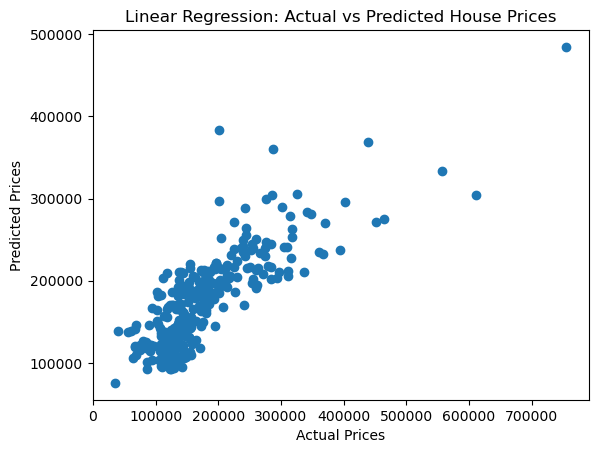

Polynomial Regression Mean Squared Error: 2710225757.279084
Best Ridge Alpha: {'alpha': 10}
Ridge Regression Mean Squared Error: 2808901306.8097234
Best Lasso Alpha: {'alpha': 100}
Lasso Regression Mean Squared Error: 2807444299.105942
Random Forest Regression Mean Squared Error: 2423235371.168738


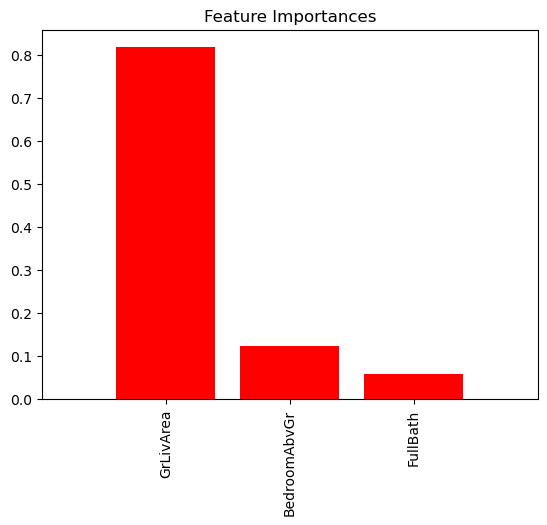

Cross-Validation Mean Squared Error: 2669139056.8982635


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (train.csv from Kaggle)
data = pd.read_csv('train.csv')

# Inspect the first few rows to understand the dataset
print(data.head())

# Handle missing data (example: filling missing LotFrontage with the median)
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

# Feature Selection: We'll use 'GrLivArea', 'BedroomAbvGr', and 'FullBath'
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']  # Target variable

# Optional: Log transformation of the target variable to handle skewed data
y_log = np.log(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# ==============================
# Linear Regression Model
# ==============================
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

# For the log-transformed target
y_pred_log = model.predict(X_test_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
print(f"Linear Regression (Log-Transformed) Mean Squared Error: {mse_log}")

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.show()

# ==============================
# Polynomial Regression (degree 2)
# ==============================
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)

# Predicting and evaluating the polynomial regression model
y_pred_poly = model_poly.predict(poly.transform(X_test))
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression Mean Squared Error: {mse_poly}")

# ==============================
# Ridge Regression (Regularization L2)
# ==============================
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5)
ridge_cv.fit(X_train, y_train)

# Predicting and evaluating the Ridge model
ridge_pred = ridge_cv.predict(X_test)
print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")

# ==============================
# Lasso Regression (Regularization L1)
# ==============================
lasso = Lasso()
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

# Predicting and evaluating the Lasso model
lasso_pred = lasso_cv.predict(X_test)
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")

# ==============================
# Random Forest Model (Non-Linear)
# ==============================
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating the Random Forest model
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest Regression Mean Squared Error: {rf_mse}")

# Feature Importance in Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# ==============================
# Cross-Validation for Linear Regression
# ==============================
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Error: {-np.mean(cv_scores)}")
